In [ ]:
!pip install python-docx

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from docx import Document

https://environment.govt.nz/publications/new-zealands-greenhouse-gas-inventory-1990-2022/

In [3]:
doc = Document('/content/GHG-Inventory-2024-Vol-2.docx')

In [5]:
tables = extract_tables(doc)

In [7]:
df=pd.DataFrame(tables[32])
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
display(df)

,Land use,Climatic \ntemperature regime,IPCC Tier 1 default emission factor applied and ranges (t C ha–1 yr–1),Reference
0,Pre-1990 natural forest,Temperate,NA,IPCC guidance applies only to drained forest o...
1,Pre-1990 and post-1989 planted and natural for...,Temperate,0.68 (range 0.41–1.91),"IPCC (2006b, section 4.2.3.2, table 4.6)"
2,Cropland,Cold temperate\nWarm temperate,5.0 ± 90%\n10.0 ± 90%,"IPCC (2006b, section 5.2.3.2, table 5.6)"
3,Grassland,Cold temperate\nWarm temperate,0.25 ± 90%\n2.5 ± 90%,"IPCC (2006b, section 6.2.3.2, table 6.3)"
4,Wetlands,NA,0.2 ± 90%,IPCC guidance applies to managed peatlands and...
5,Settlements,Cold temperate\nWarm temperate,5.0 ± 90%\n10.0 ± 90%,"Cropland emission factors used (IPCC, 2006b, s..."
6,Other land,NA,NE,"No IPCC guidance is available (IPCC, 2006b, ch..."


In [8]:
df=pd.DataFrame(tables[36])
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
display(df)

,Factor affecting wood density,Range in predicted density,Range in predicted density
0,Factor affecting wood density,(kg m–3),(% difference)
1,Temperature: 8°C versus 16°C,359–439,22
2,Age: 10-year-old versus 30-year-old,380–446,17
3,C:N ratio: 12 versus 25,384–418,9
4,Stocking: 200 versus 500 stems ha–1,395–411,4


In [11]:
print('\nPost-1989 forest yield table (tonnes C ha–1)')
df=pd.DataFrame(tables[40])
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
display(df.tail(5))


Post-1989 forest yield table (tonnes C ha–1)


,Age,Above-ground biomass,Below-ground biomass,Dead wood,Litter,Total biomass
28,28,61.4,15.3,0.2,0.8,77.7
29,29,62.9,15.7,0.2,0.8,79.6
30,30,64.1,16.0,0.2,0.9,81.3
31,31,65.2,16.3,0.2,0.9,82.7
32,32,66.1,16.5,0.2,0.9,83.8


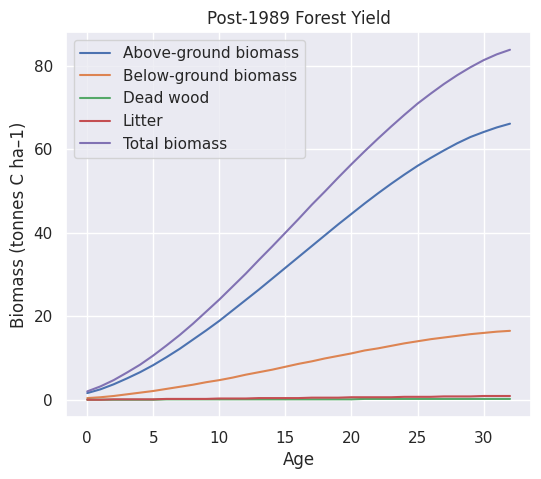

In [12]:
df.columns = ['Age', 'Above-ground biomass', 'Below-ground biomass', 'Dead wood', 'Litter', 'Total biomass']

df = df.astype({'Age': int, 'Above-ground biomass': float, 'Below-ground biomass': float, 'Dead wood': float, 'Litter': float, 'Total biomass': float})

plt.figure(figsize=(6, 5))

plt.plot(df['Age'], df['Above-ground biomass'], label='Above-ground biomass')
plt.plot(df['Age'], df['Below-ground biomass'], label='Below-ground biomass')
plt.plot(df['Age'], df['Dead wood'], label='Dead wood')
plt.plot(df['Age'], df['Litter'], label='Litter')
plt.plot(df['Age'], df['Total biomass'], label='Total biomass')

plt.xlabel('Age')
plt.ylabel('Biomass (tonnes C ha–1)')
plt.title('Post-1989 Forest Yield')
plt.legend()
plt.grid(True)

plt.show()